<a href="https://colab.research.google.com/github/J-Princess/ML-AI-DS-Projects/blob/main/Music_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course work

### Music Dataset

Welcome to my coursework project; here, I am working with the music data, which was obtained from the Kaggle platform. The dataset contains 60 variables.

#### Stakeholders:

They include those who might have an interest in the output of the model or are impacted it. The stakeholders for this project are
- Music executive who might use this model to identify customer demographics.
- Data Scientists who use it to conduct analysis and predictions.
- Record labels who may use the datsets to understand customer demographics, trends and sales.
- Streaming Platforms like Spotify and Apple music.
- Machine Learning Engineers who want to build predictions and models based on datasets into real-life applications and systems.
- Coding Communities, communities like Kaggle, which consist of students, researchers and professionals, will use the dataset for competitions and learning.

### Research Questions

These are questions that arose at every point of this notebook and the execution of this project

1. Who created this data and why?
2. What is the use_case/ what do I aim to predict with the dataset?
3. What information is contained in this dataset?
4. Is the data in the dataset balanced?
5. are there missing values in the datasets?
6. What do I do with the missing data values?
7. Is this a regression or classification problem?
8. What variables will be used for the model?
9. what methods of preprocessing are best suited for the model?
10. What do i do with the categorical data and are they needed for my model?
11. Is the dataset messy? Do I need to clean it?
12. What null hypothesis can be inferred from the data?
13. Does the missing values leave out the same group
14. Will the results of my models vary with different methods of preprocessing?

In [ ]:
#importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from scipy.stats import zscore, ttest_rel
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

There are two datsets for this project, I will train and test my models on the 3 sec features data because it is much larger and predict the 30 sec features data.

In [ ]:
# loading the dataset in a dataframe
df = pd.read_csv('data/music/features_3_sec.csv')

# veiwing dataset
print(df.sample(10))
df.shape

                 filename  length  chroma_stft_mean  chroma_stft_var  \
9347     rock.00035.6.wav   66149          0.515921         0.077035   
4234   hiphop.00024.0.wav   66149          0.423649         0.084430   
6013    metal.00002.1.wav   66149          0.356205         0.073964   
165     blues.00016.5.wav   66149          0.300384         0.096584   
4364   hiphop.00037.2.wav   66149          0.453183         0.089146   
6202    metal.00021.0.wav   66149          0.507923         0.063827   
9090     rock.00009.8.wav   66149          0.338074         0.087031   
827     blues.00082.7.wav   66149          0.328063         0.084164   
2373  country.00037.8.wav   66149          0.367512         0.080679   
6850    metal.00085.8.wav   66149          0.416547         0.084058   

      rms_mean   rms_var  spectral_centroid_mean  spectral_centroid_var  \
9347  0.119417  0.000427             1932.876052           3.655689e+05   
4234  0.202598  0.008743             2488.858639         

(9990, 60)

## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
df.describe(include='all')

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
count,9990,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990
unique,9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,blues.00000.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,...,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614,NaN
std,NaN,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,...,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212,NaN
min,NaN,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,...,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131,NaN
25%,NaN,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,...,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365,NaN
50%,NaN,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,...,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155,NaN
75%,NaN,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,...,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421,NaN


#### Missing Values

In [ ]:
# Identify where the missing values are located in the dataset
df[df.isnull().any(axis=1)].index

Index([], dtype='int64')

In [ ]:
df.isna().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0


There are missing values in the 12 variables in the dataset. I will drop them from the dataset and use the rest of the columns as my features.



In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
df.label.value_counts()

,count
label,
blues,1000
jazz,1000
metal,1000
pop,1000
reggae,1000
disco,999
classical,998
hiphop,998
rock,998


In [ ]:
df.filename.value_counts()

,count
filename,
blues.00000.0.wav,1
metal.00067.1.wav,1
metal.00066.4.wav,1
metal.00066.5.wav,1
metal.00066.6.wav,1
...,...
disco.00033.6.wav,1
disco.00033.7.wav,1
disco.00033.8.wav,1


### Visualisation

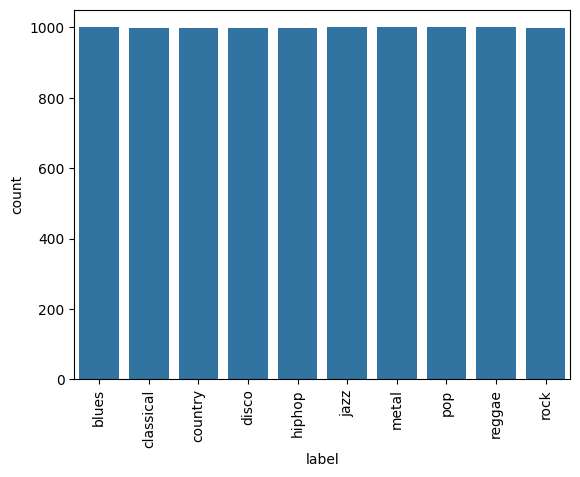

In [ ]:
# plotting the categories
sns.countplot(x=df.label)
plt.xticks(rotation=90);

In the columns in the dataset, df, the label column is the only intuitive, discrete values with equal amount of categories and signicantly differs from the others and is categorical.
The label column is the target so therefore this is a classification problem.
The filename column contains data that includes some label of sorts and no actual value.

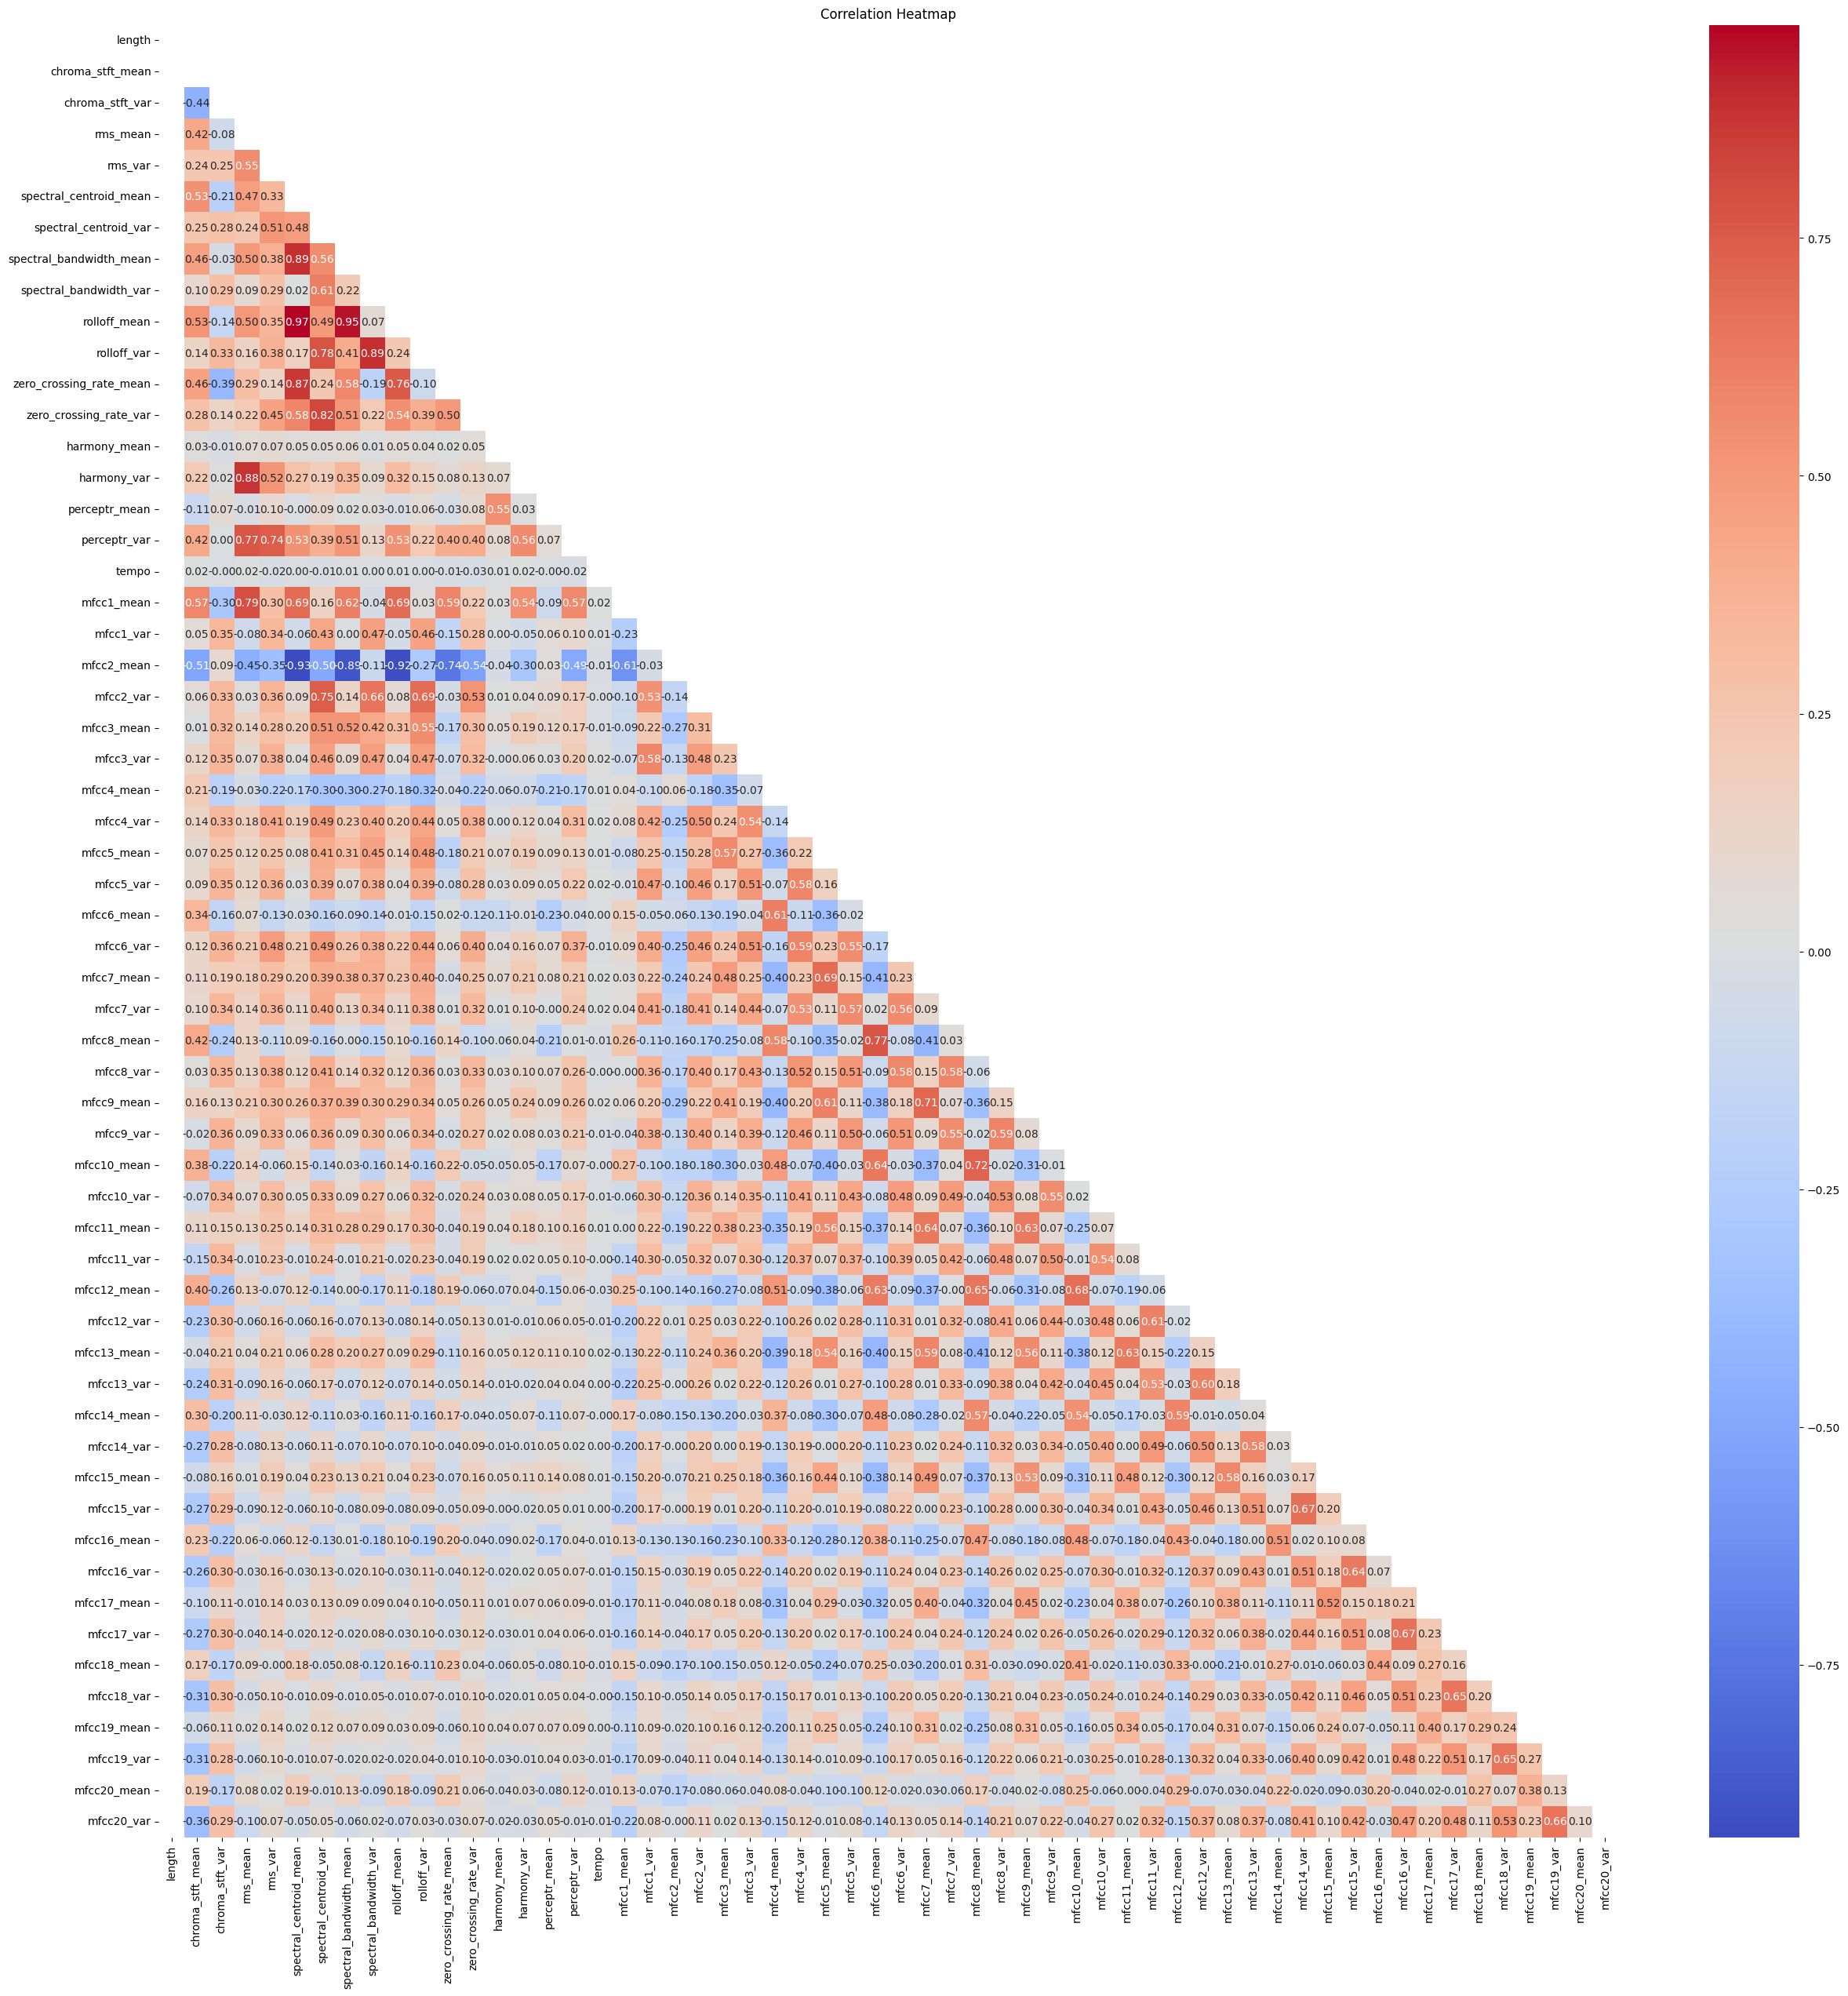

In [ ]:
# modified from code gotten from the insurance-EDA-worksheet in Coursework Support
correlation_matrix = df.corr(method='pearson', min_periods=1, numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# The data is to large to view the relationship between all the variables so i will be selected only a few.
column_plot = ['mfcc13_mean', 'mfcc15_var','length']

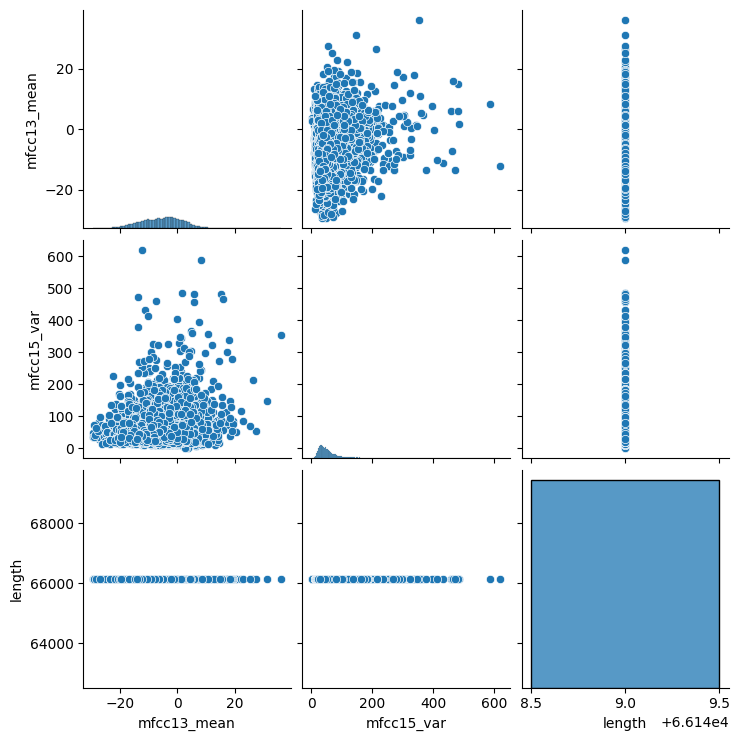

In [ ]:
sns.pairplot(df[column_plot], vars=column_plot)
plt.show()

### Outliers

In [ ]:
# Using the Zscore method to detect ouliers
z_scores = zscore(df['length'])
outliers = df[np.abs(z_scores) > 3]

print(outliers.count())

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

#### Feature Selection and Engineering

#### Data Splitting

I will be dropping the filename column from the dataset because it contains variable names and no values that occur once, so it won't be useful for training and several columns that contains null values. I won't be dropping the label column even though it contains one missing value. The objective is to biuld a model that predicts the missing value and i will also use it to predict
the second dataset.

In [ ]:
data_frame = df.drop(['filename','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var'], axis=1)
data_frame.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,blues


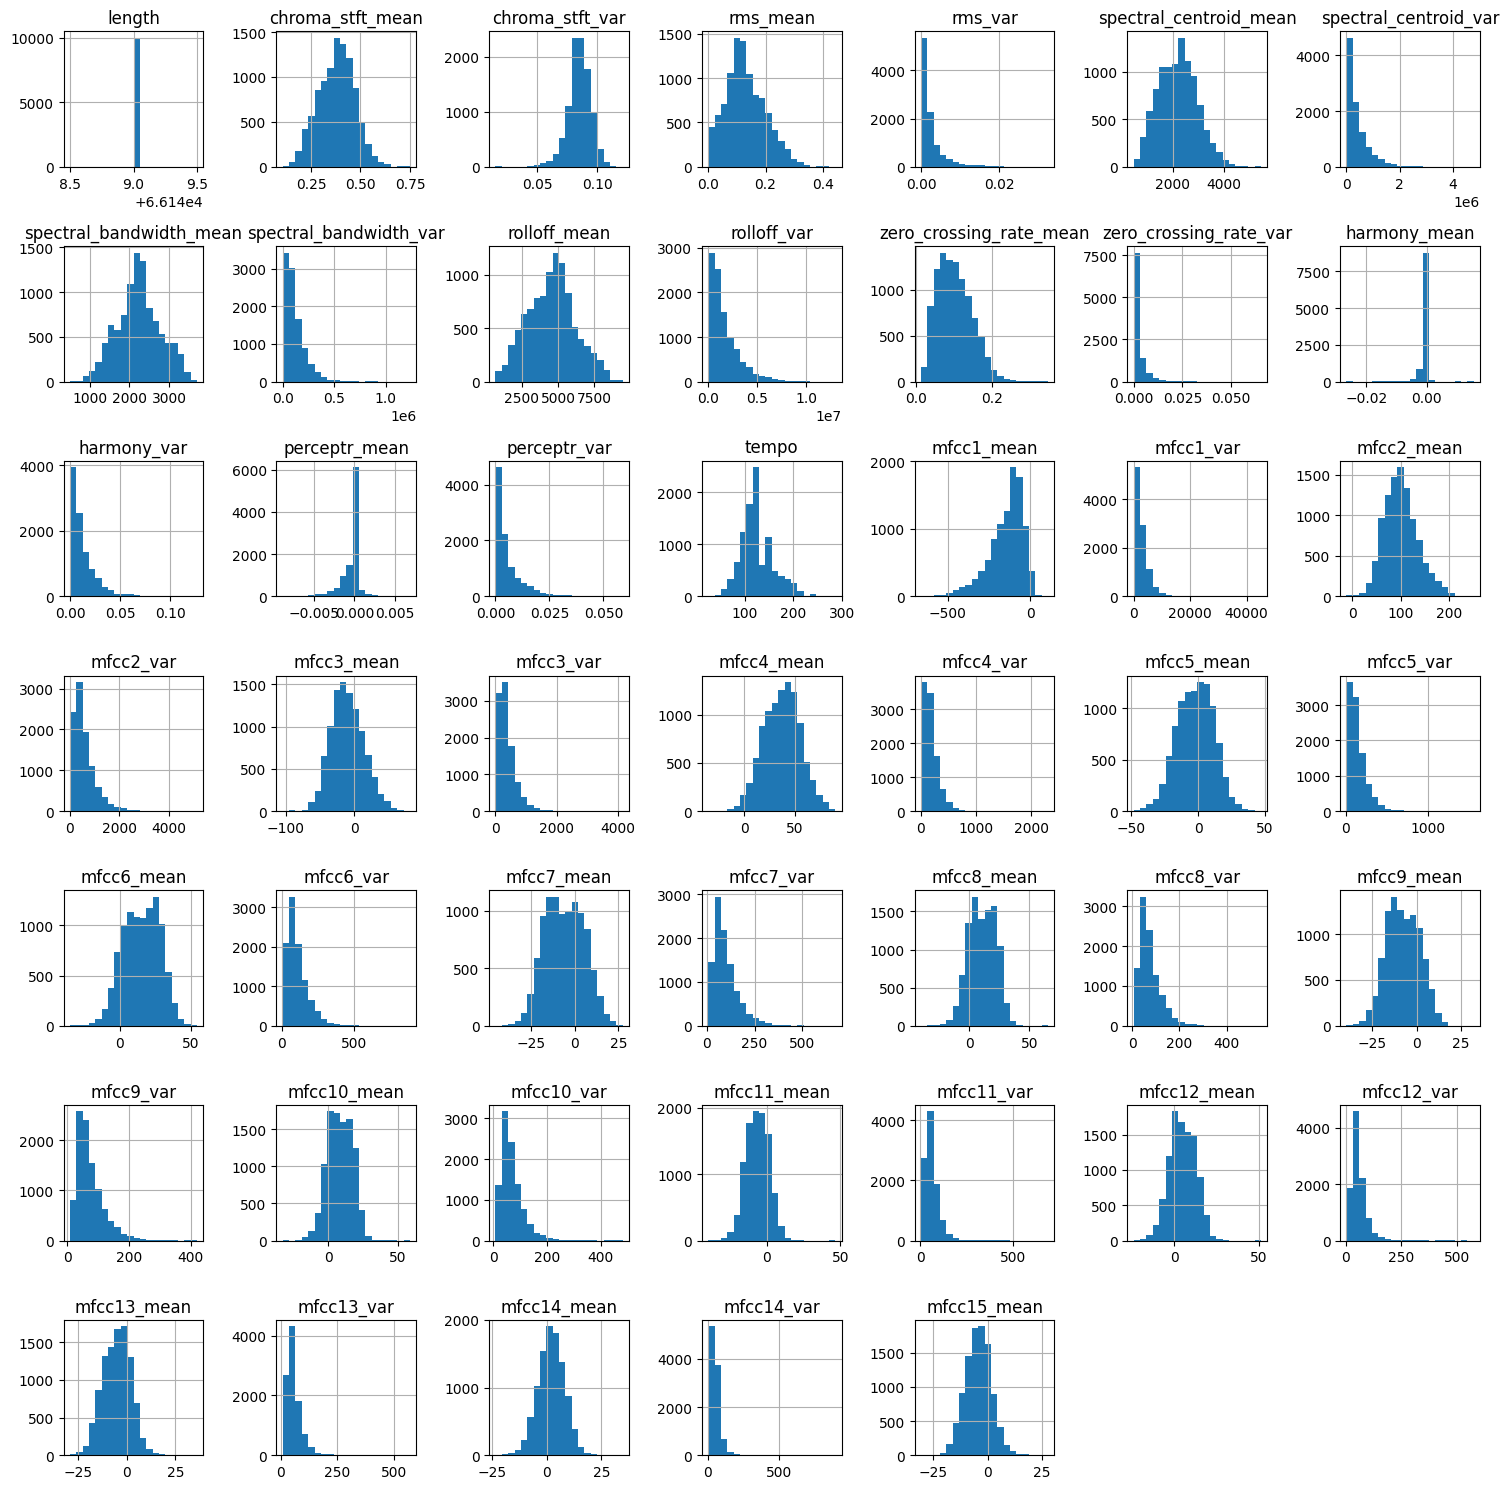

In [ ]:
data_frame.hist(bins=20,figsize=(15, 15))

plt.tight_layout()
plt.show()

In [ ]:
# Feature selection
# X = data_frame.iloc[:, :-1]

non_missing_data = data_frame[data_frame['label'].notnull()]
print(non_missing_data.shape)
missing_data = data_frame[data_frame['label'].isnull()]
print(missing_data.shape)
# Y = data_frame.iloc[:, -1]
X = non_missing_data.drop('label', axis=1)
y = non_missing_data['label']
print(X.shape)
print(y.shape)
# gotten from coursework support worksheet
# Convert label data to numeric
# y = pd.factorize(df['label'])[0]
# print(y)
data_frame.shape

(9990, 48)
(0, 48)
(9990, 47)
(9990,)


(9990, 48)

In [ ]:
# Define seeds for train-test splits and Model Evaluation
seeds = np.arange(10)

# Splitting training data into training and test sets
for seed in seeds:
    train_X, test_X, train_y,test_y = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)

train_X.shape, test_X.shape, train_y.shape,test_y.shape

((7492, 47), (2498, 47), (7492,), (2498,))

I have split the dataset variables into target and features, i am using the rest of the variables as features, While using too many features can lead to the curse of dimensionality, which causes overfitting, I decided to use all variables because, from the result of a comparison I made using a mixed selection of variables and all variables, I got a better result using the latter. It allows me to establish a threshold.

For the train and test set, I chose a test_size of 0.25 and a random_size of 42 due to the comparisons I made with combinations of various test sizes and random states; I found these values gave the best results. I will use the random state of 15 throughout this notebook to ensure consistency, reproducibility, and fair comparisons.

#### Model Selection
I will be using 4 models to compare, which gives a better prediction. Trying different models allows me to identify which one best captures the patterns in the dataset.
- Linear Models: It assumes a linear relationship between features and targer variables, its simple and interpretable but sensitive to outliers
- Ensembles, because they do not require much preprocessing. They are excellent for capturing non-linear relationships

- KNN Classifier

#### Logistic Regression

In [ ]:
pipeline_lg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

# List to store model results
results_lg = []

# Parameter grid for RandomizedSearchCV
param_grid_lg = {
    'model__max_iter': [100, 500, 1000, 1500],
    'model__C': [1, 2, 3]
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_lg = RandomizedSearchCV(
pipeline_lg, param_grid_lg, n_iter=30, cv=10, random_state=42, scoring='accuracy', return_train_score=True
)
  # Fit the model
  random_search_lg.fit(train_X, train_y)

  # Get the best parameters
  best_lg = random_search_lg.best_estimator_
  # Get the accuracies of the predictions
  lg_test_scores = accuracy_score(test_y, best_lg.predict(test_X))
  # Append the results to a list
  results_lg.append(lg_test_scores)

print("Best Score for random search:", random_search_lg.best_score_)
print("Best Parameters for random search:", random_search_lg.best_params_)
print("Test set accuracies for Random Forest:", results_lg)
print("Test set mean accuracy for Random Forest:", np.mean(results_lg))
print()

# Evaluating the predictions made by the best Logistic Model
class_report_lg = classification_report(test_y, best_lg.predict(test_X))
print("Logistic Regression Model:")
print(class_report_lg)

Best Score for random search: 0.7040813529149978
Best Parameters for random search: {'model__max_iter': 500, 'model__C': 2}
Test set accuracies for Random Forest: [0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011, 0.7097678142514011]
Test set mean accuracy for Random Forest: 0.709767814251401

Logistic Regression Model:
              precision    recall  f1-score   support

       blues       0.64      0.70      0.66       250
   classical       0.92      0.97      0.95       250
     country       0.62      0.61      0.61       249
       disco       0.65      0.62      0.63       250
      hiphop       0.73      0.60      0.66       250
        jazz       0.76      0.78      0.77       250
       metal       0.83      0.87      0.85       250
         pop       0.76      0.80      0.78       250
      reggae       0.65      0.64      0.65       250
       

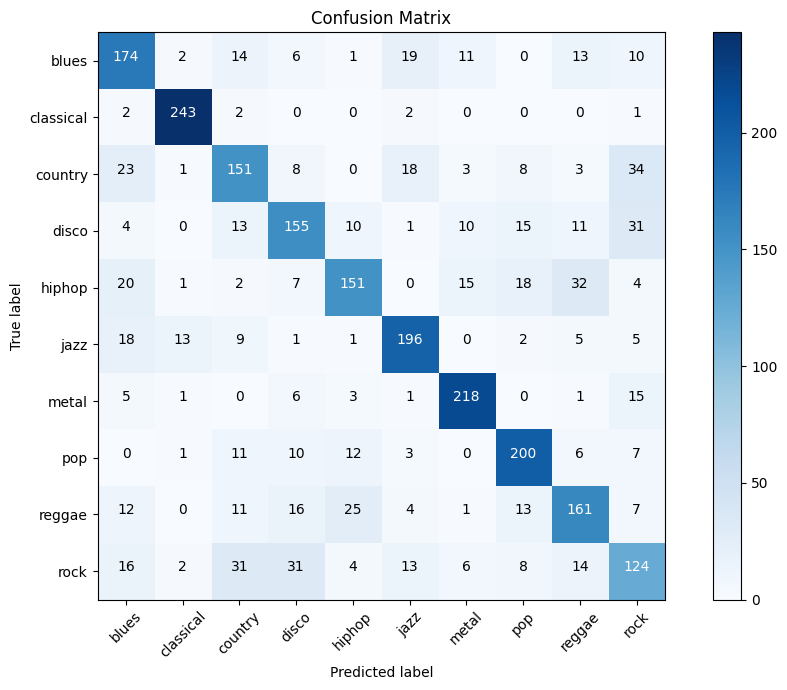

In [ ]:
# Calculate confusion matrix
# Modified from code gotten from coursework support
conf_matrix_lg= confusion_matrix(test_y, best_lg.predict(test_X))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_lg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adjust based on the number of classes
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

# Label the confusion matrix
thresh = conf_matrix_lg.max() / 2.
for i, j in np.ndindex(conf_matrix_lg.shape):
    plt.text(j, i, format(conf_matrix_lg[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_lg[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

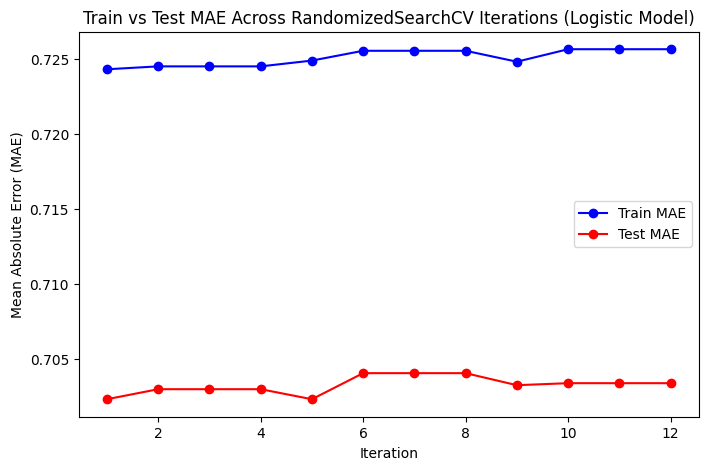

In [ ]:
# Access cross-validation results for Loss Curve
lg_cv_results = pd.DataFrame(random_search_lg.cv_results_)

# Get mean training and test scores
train_scores_lg = lg_cv_results['mean_train_score']
test_scores_lg = lg_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores_lg) + 1), train_scores_lg, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_lg) + 1), test_scores_lg, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations (Logistic Model)')
plt.legend()
plt.show()

After playing around with different max_iter for the logistic regression model, I noticed that fewer iterations make the model converge early. It appears that the linear model is underfitting.

#### KNN

In [ ]:
# Creating the pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

# List to store model results
results_knn = []

# Parameter grid for RandomizedSearchCV
param_grid_knn = {
    'model__n_neighbors': [2, 5, 15, 20, 10, 30],
    'model__leaf_size': [20, 30, 50],
    'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_knn = RandomizedSearchCV(
pipeline_knn, param_grid_knn, n_iter=10, cv=10, random_state=42, scoring='accuracy', return_train_score=True
)
  random_search_knn.fit(train_X, train_y)
  best_knn = random_search_knn.best_estimator_
  knn_test_scores = accuracy_score(test_y, best_knn.predict(test_X))
  results_knn.append(knn_test_scores)

print("Best Score for random search:", random_search_knn.best_score_)
print("Best Parameters for random search:", random_search_knn.best_params_)
print("Test set accuracies for KNN:", results_knn)
print("Test set mean accuracy for KNN:", np.mean(results_knn))
print()

# Evaluating the predictions made by the best KNN Model
class_report_knn = classification_report(test_y, best_knn.predict(test_X))
print("KNN Model:")
print(class_report_knn)

Best Score for random search: 0.868790031152648
Best Parameters for random search: {'model__n_neighbors': 2, 'model__leaf_size': 20, 'model__algorithm': 'auto'}
Test set accuracies for KNN: [0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281, 0.877502001601281]
Test set mean accuracy for KNN: 0.877502001601281

KNN Model:
              precision    recall  f1-score   support

       blues       0.85      0.93      0.89       250
   classical       0.88      0.98      0.93       250
     country       0.75      0.87      0.80       249
       disco       0.78      0.92      0.85       250
      hiphop       0.90      0.90      0.90       250
        jazz       0.91      0.80      0.85       250
       metal       0.95      0.94      0.94       250
         pop       0.96      0.84      0.90       250
      reggae       0.92      0.88      0.90       250
        rock    

I had to reduce the hyperparameters and number of iteration for the KNN model because it's taking time to execute.

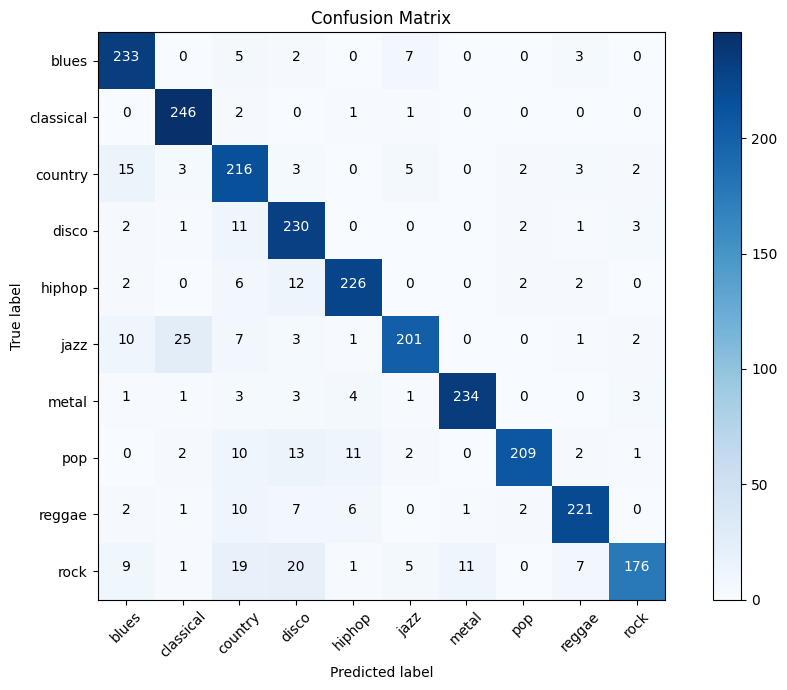

In [ ]:
# Modified from code gotten from coursework support
conf_matrix_knn= confusion_matrix(test_y, best_knn.predict(test_X))


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adjust based on the number of classes
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

# Label the confusion matrix
thresh = conf_matrix_knn.max() / 2.
for i, j in np.ndindex(conf_matrix_knn.shape):
    plt.text(j, i, format(conf_matrix_knn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_knn[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

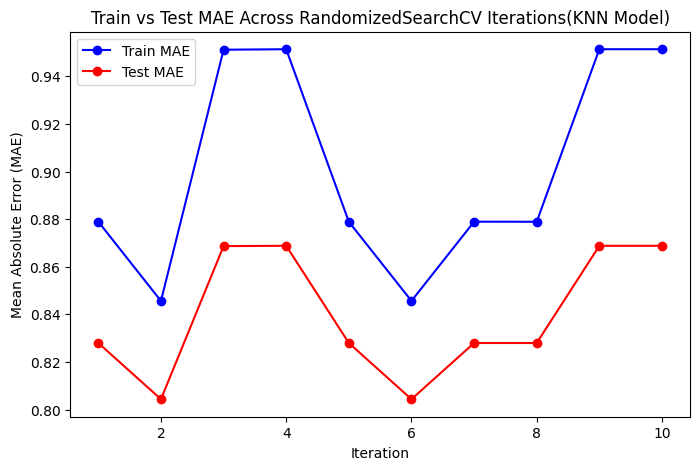

In [ ]:
# Access cross-validation results for Loss Curve
knn_cv_results = pd.DataFrame(random_search_knn.cv_results_)

# Get mean training and test scores
train_scores_knn = knn_cv_results['mean_train_score']
test_scores_knn = knn_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores_knn) + 1), train_scores_knn, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_knn) + 1), test_scores_knn, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(KNN Model)')
plt.legend()
plt.show()

The KNN model seems to be generalising well.

#### Random Forest

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# List to store model results
results_rf = []

# Parameter grid for RandomizedSearchCV
param_grid_rf = {
    'model__n_estimators': [50, 100, 300],
    'model__max_depth': [None,3, 5,10,],
    'model__max_features': [None,'sqrt','log2', 'log_loss', 2, 5]
}


# Perform randomised search with cross-validation
for seed in seeds:
  random_search_rf = RandomizedSearchCV(
pipeline_rf, param_grid_rf, n_iter=30, cv=10, random_state=42, scoring='accuracy', return_train_score=True
)
  random_search_rf.fit(train_X, train_y)
  best_rf = random_search_rf.best_estimator_
  rf_test_scores = accuracy_score(test_y, best_rf.predict(test_X))
  results_rf.append(rf_test_scores)

print("Best Score for random search:", random_search_rf.best_score_)
print("Best Parameters for random search:", random_search_rf.best_params_)
print("Test set accuracies for Random Forest:", results_rf)
print("Test set mean accuracy for Random Forest:", np.mean(results_rf))
print()

# Evaluating the predictions made by the Random Forest  Model
class_report_rf = classification_report(test_y, best_rf.predict(test_X))
print("Random Forest Model:")
print(class_report_rf)

In [ ]:
# Modified from code gotten from coursework support
conf_matrix_rf= confusion_matrix(test_y, best_rf.predict(test_X))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.colorbar()

# Adjust based on the number of classes
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

# Label the confusion matrix
thresh = conf_matrix_rf.max() / 2.
for i, j in np.ndindex(conf_matrix_rf.shape):
    plt.text(j, i, format(conf_matrix_rf[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_rf[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
# Access cross-validation results for Loss Curve
rf_cv_results = pd.DataFrame(random_search_rf.cv_results_)

# Get mean training and test scores
train_scores_rf = rf_cv_results['mean_train_score']
test_scores_rf = rf_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores_rf) + 1), train_scores_rf, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_rf) + 1), test_scores_rf, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Random forest Model)')
plt.legend()
plt.show()

#### Gradient Boosting

In [ ]:
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

# List to store model results
results_gb = []

# Parameter grid for RandomizedSearchCV
param_grid_gb = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': [5, 10, None],
    'model__max_depth': [None,3, 5,6,10,],
    'model__learning_rate': [ 0.05, 0.1, 0.5, 1.0],
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_gb = RandomizedSearchCV(
pipeline_gb, param_grid_gb, n_iter=30, cv=10, random_state=42, scoring='accuracy', return_train_score=True
)
  random_search_gb.fit(train_X, train_y)
  best_gb = random_search_gb.best_estimator_
  gb_test_scores = accuracy_score(test_y, best_gb.predict(test_X))
  results_gb.append(gb_test_scores)

print("Best Score for random search:", random_search_gb.best_score_)
print("Best Parameters for random search:", random_search_gb.best_params_)
print("Test set accuracies for Random Forest:", results_gb)
print("Test set mean accuracy for Random Forest:", np.mean(results_gb))
print()

# Evaluating the predictions made by the Gradient Boosting Model
class_report_gb = classification_report(test_y, best_gb.predict(test_X))
class_report_gb_df = pd.DataFrame(class_report_gb).transpose()
print("Gradient Boosting Model:")
print(class_report_gb_df)

In [ ]:
# Modified from code gotten from coursework support
conf_matrix_gb= confusion_matrix(test_y, best_gb.predict(test_X))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_gb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adjust based on the number of classes
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

# Label the confusion matrix
thresh = conf_matrix_gb.max() / 2.
for i, j in np.ndindex(conf_matrix_gb.shape):
    plt.text(j, i, format(conf_matrix_gb[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_gb[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
# Access cross-validation results for Loss Curve
gb_cv_results = pd.DataFrame(random_search_gb.cv_results_)

# Get mean training and test scores
train_scores_gb = gb_cv_results['mean_train_score']
test_scores_gb = gb_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores_gb) + 1), train_scores_gb, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_gb) + 1), test_scores_gb, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Gradient Boosting Model)')
plt.legend()
plt.show()

#### XGB

In [ ]:
# Modified from code gotten from coursework support
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

# List to store model results
results_xgb = []

# Parameter grid for RandomizedSearchCV
param_grid_xgb = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': [5, 10, None],
    'model__learning_rate': [0.5, 1.0],
    'model__subsample': [0.05, 0.1, 0.5, 1.0],
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_xgb = RandomizedSearchCV(
pipeline_xgb, param_grid_xgb, n_iter=30, cv=10, random_state=42, scoring='accuracy', return_train_score=True
)
  random_search_xgb.fit(train_X, train_y)
  best_xgb = random_search_xgb.best_estimator_
  xgb_test_scores = accuracy_score(test_y, best_xgb.predict(test_X))
  results_xgb.append(xgb_test_scores)

print("Best Score for random search:", random_search_xgb.best_score_)
print("Best Parameters for random search:", random_search_xgb.best_params_)
print("Test set accuracies for Gradient Boosting:", results_xgb)
print("Test set mean accuracy for Gradient Boosting:", np.mean(results_xgb))
print()

# Evaluating the predictions made by the Gradient Boosting Model
class_report_xgb = classification_report(test_y, best_xgb.predict(test_X))
print("Gradient Boosting Model:")
print(class_report_xgb)

In [ ]:
# Modified from code gotten from coursework support
conf_matrix_xgb= confusion_matrix(test_y, best_xgb.predict(test_X))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_xgb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adjust based on the number of classes
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))

# Label the confusion matrix
thresh = conf_matrix_xgb.max() / 2.
for i, j in np.ndindex(conf_matrix_xgb.shape):
    plt.text(j, i, format(conf_matrix_xgb[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_xgb[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
# Access cross-validation results for Loss Curve
xgb_cv_results = pd.DataFrame(random_search_xgb.cv_results_)

# Get mean training and test scores
train_scores_xgb = xgb_cv_results['mean_train_score']
test_scores_xgb = xgb_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores_xgb) + 1), train_scores_xgb, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_xgb) + 1), test_scores_xgb, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(XGB Model)')
plt.legend()
plt.show()

##### Comparing Models

In [ ]:
# Perform paired t-test on the results
t_stat1, p_value1 = ttest_rel(results_rf, results_xgb)
t_stat2, p_value2 = ttest_rel(results_rf, results_knn)
t_stat3, p_value3 = ttest_rel(results_rf, results_gb)
t_stat4, p_value4 = ttest_rel(results_rf, results_lg)
t_stat5, p_value5 = ttest_rel(results_xgb, results_knn)
t_stat6, p_value6 = ttest_rel(results_xgb, results_gb)
t_stat7, p_value7 = ttest_rel(results_xgb, results_lg)
t_stat8, p_value8 = ttest_rel(results_lg, results_knn)
t_stat9, p_value9 = ttest_rel(results_lg, results_gb)
t_stat0, p_value0 = ttest_rel(results_gb, results_knn)



print(f"T-test results: t_stat = {t_stat1:.4f}, p_value = {p_value1:.4f}")

if p_value1 < 0.05:
    print("The difference between the models, Random Forest and KNN is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat2:.4f}, p_value = {p_value2:.4f}")

if p_value2 < 0.05:
    print("The difference between the models, Random Forest and knn is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat3:.4f}, p_value = {p_value3:.4f}")

if p_value3 < 0.05:
    print("The difference between the models, Random Forest and gb is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat4:.4f}, p_value = {p_value4:.4f}")

if p_value4 < 0.05:
    print("The difference between the models, Random Forest and Logistic Regression is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat5:.4f}, p_value = {p_value5:.4f}")

if p_value5 < 0.05:
    print("The difference between the models, XGB and knn is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat6:.4f}, p_value = {p_value6:.4f}")

if p_value6 < 0.05:
    print("The difference between the models, XGB and gb is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat7:.4f}, p_value = {p_value7:.4f}")

if p_value7 < 0.05:
    print("The difference between the models, KNN and logistic regression is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat8:.4f}, p_value = {p_value8:.4f}")

if p_value8 < 0.05:
    print("The difference between the models, logistic regression and knn is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat9:.4f}, p_value = {p_value9:.4f}")

if p_value9 < 0.05:
    print("The difference between the models,logistic regression and gb is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat0:.4f}, p_value = {p_value0:.4f}")

if p_value0 < 0.05:
    print("The difference between the models, gb and knn is statistically significant.")
else:
    print("No significant difference between the models.")

After comparing the results between each model, the differences between the other models and the XGB model are significant. So I will use the XGB model to fill missing values and make predictions.

* Reflection

In the pipelines above, I have combined Model Training, Predictions and evaluations, which is a more comprehensive approach, and this method ensures I am tuning hyperparameters without using the test set; I was able to prevent data leakage and perform a realistic performance estimation. I had to reduce the numbers of parameters for tuning beacuse in classifiers like KNN, it has to compute distances between the test point and all training samples, which scales linearly with the number of training points. The larger the dataset, the longer it takes.

### No Scaling of Data

In [ ]:
# Gradient Boosting Model
pipeline_gb_noscl = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state = 42))
])

pipeline_lg_noscl = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])


param_dist_lg_noscl = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_iter': [100, 500, 1000, 1500]
}


param_dist_gb_noscl = {
    'classifier__n_estimators': [100, 200, 300, 50],
    'classifier__max_features': [None, 5, 10],
    'classifier__max_depth': [None, 5, 10]
}



# Storage for results

results_gb_noscl = []
results_lg_noscl = []

# Perform train-test splits and evaluations
for seed in seeds:

    # RandomizedSearchCV for Gradient Boosting
    random_search_gb_noscl = RandomizedSearchCV(
        pipeline_gb_noscl, param_dist_gb_noscl, n_iter=10, scoring='accuracy', cv=10, random_state=42
    )
    random_search_gb_noscl.fit(train_X, train_y)
    best_gb_noscl = random_search_gb_noscl.best_estimator_
    gb_test_score_noscl = accuracy_score(test_y, best_gb_noscl.predict(test_X))
    results_gb.append(gb_test_score_noscl)


    # RandomizedSearchCV for Logistic Regression
    random_search_lg_noscl = RandomizedSearchCV(
        pipeline_lg_noscl, param_dist_lg_noscl, n_iter=10, scoring='accuracy', cv=10, random_state=42
    )
    random_search_lg_noscl.fit(train_X, train_y)
    best_lg_noscl = random_search_lg_noscl.best_estimator_
    lg_test_score_noscl = accuracy_score(test_y, best_lg_noscl.predict(test_X))
    results_lg_noscl.append(lg_test_score_noscl)

#Perform paired t-test on the results
t_stat1, p_value1 = ttest_rel(results_rf, results_dt)




# Output results


print("Test set accuracies for Gradient boosting:", results_gb_noscl)

print("Test set accuracies for Logistics Regression:", results_lg_noscl)

print(f"T-test results: t_stat = {t_stat1:.4f}, p_value = {p_value1:.4f}")


if p_value1 < 0.05:
    print("The difference between the models, rf and gb is statistically significant.")
else:
    print("No significant difference between the models.")

print(f"T-test results: t_stat = {t_stat1:.4f}, p_value = {p_value1:.4f}")

# Evaluating the predictions made by the Gradient Boosting Model
class_report_noscl = classification_report(test_y, best_gb_noscl.predict(test_X))
print("Gradient Boosting Model:")
print(class_report_noscl)

Comparing the results of the gradient boosting model, scaling vs no scaling, there is a vast difference between the results. So scaling the data is a crucial step.

## Making Predictions



#### Imputing Missing Values

In [ ]:
# Splitting missing data
X_miss_values = missing_data.drop('label', axis=1)
Y_miss_values = missing_data['label']

# Predicting
predictions = best_xgb.predict(Y_miss_values)
rounded_predictions = np.round(predictions)
print(rounded_predictions)

# Imputing missing values
missing_data['label'] = rounded_predictions
print(missing_data.describe(include='all'))

print(f"Number of missing 'label' values after imputation: {missing_data['age'].isnull().sum()}")


In [ ]:
# Making a new dataframe with imputed values
df_imputed = pd.concat([non_missing_data, missing_data])

# visualising the data
sns.countplot(x=df_imputed.label)
plt.xticks(rotation=90);

#### Second Dataset; features-30 sec

Here, I am going to load the second music data, and predict it with the model.

In [ ]:
# Loading 2nd dataset in a dataframe
df2 = pd.read_csv('data/music/features_30_sec.csv')
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.describe(include='all')

In [ ]:
df2.isna().sum()

In [ ]:
# plot the categories
sns.countplot(x=df2.label)
plt.xticks(rotation=90);

In [ ]:
correlation_matrix_df2 = df2.corr(method='pearson', min_periods=1, numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix_df2, dtype=bool))
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_df2, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap of 30 sec Features')
plt.show()

In [ ]:
# Splitting missing data
X_values = df2.drop('label', axis=1)
y_values = df2['label']

# Predicting
preds =  best_xgb.predict(X_values)
rounded_preds = np.round(preds)


## Conclusion

During this project, I understood how vital preprocessing steps, like scaling and trimming data, are for performance. I have also learned that Identifying bias in models and data sets, relationships between variables, and Careful feature selection are essential to preventing discriminatory models and ensuring fairness. When working on any dataset, the goal is not just to predict accurately but also to understand the underlying factors influencing music classifications while maintaining model generalizability and performance, and determining how different models capture different aspects of the data. Also, how can reducing the parameters for tuning help with overfitting.

Overall, I have learned the importance of comprehensive data exploration, understood the nuances of model selection and hyperparameter tuning, recognised the need for continuous learning and model improvement, and how transparency in model development is key. Documenting every step helps to maintain transparency.

## References

ChatGPT, 2024. Code modified and explained by GPT-4o mini. OpenAI, (Metrics for Classification Models, December 13).

ChatGPT, 2024. Code explanined by GPT-4o mini. OpenAI, (Hyperparameter Tuning and Cross Validation Methods, December 13).

ChatGPT, 2024. Code explanined by GPT-4o mini. OpenAI, (AUC, December 14).

Haixia, Lui. 2024, Lecture Workbooks.
